In [1]:
import requests #used to make HTTP requests
import pandas as pd #library for data manipulation

# create request header
headers = {'User-Agent': "iyerrohan123@gmail.com"}

# get all companies data
companyTickers = requests.get(
    "https://www.sec.gov/files/company_tickers.json",
    headers=headers
    )

In [8]:
print(companyTickers.json().keys())

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [3]:
# review response / keys
print(companyTickers.json().keys())

# format response to dictionary and get first key/value
firstEntry = companyTickers.json()['0']

# parse CIK // without leading zeros
directCik = companyTickers.json()['0']['cik_str']

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [2]:
# dictionary to dataframe
companyData = pd.DataFrame.from_dict(companyTickers.json(),
                                     orient='index')

In [4]:
# add leading zeros to CIK
companyData['cik_str'] = companyData['cik_str'].astype(
                           str).str.zfill(10)

In [6]:
# review data
print(companyData[:1])


      cik_str ticker       title
0  0000320193   AAPL  Apple Inc.


C:\Users\RIyer\AppData\Local\Temp\ipykernel_33952\3950520394.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cik = companyData[0:1].cik_str[0]


In [9]:
# get company specific filing metadata
filingMetadata = requests.get(
    f'https://data.sec.gov/submissions/CIK{cik}.json',
    headers=headers
    )


In [10]:
# review json 
print(filingMetadata.json().keys())
filingMetadata.json()['filings']
filingMetadata.json()['filings'].keys()
filingMetadata.json()['filings']['recent']
filingMetadata.json()['filings']['recent'].keys()

dict_keys(['cik', 'entityType', 'sic', 'sicDescription', 'ownerOrg', 'insiderTransactionForOwnerExists', 'insiderTransactionForIssuerExists', 'name', 'tickers', 'exchanges', 'ein', 'description', 'website', 'investorWebsite', 'category', 'fiscalYearEnd', 'stateOfIncorporation', 'stateOfIncorporationDescription', 'addresses', 'phone', 'flags', 'formerNames', 'filings'])


dict_keys(['accessionNumber', 'filingDate', 'reportDate', 'acceptanceDateTime', 'act', 'form', 'fileNumber', 'filmNumber', 'items', 'core_type', 'size', 'isXBRL', 'isInlineXBRL', 'primaryDocument', 'primaryDocDescription'])

In [11]:
# dictionary to dataframe
allForms = pd.DataFrame.from_dict(
             filingMetadata.json()['filings']['recent']
             )

In [12]:
# review columns
allForms.columns
allForms[['accessionNumber', 'reportDate', 'form']].head(50)

accessionNumber  reportDate      form
0   0001140361-24-040659  2024-09-10       8-K
1   0001140361-24-038601  2024-08-26       8-K
2   0001140361-24-038403  2024-08-20       8-K
3   0000320193-24-000088  2024-08-15         4
4   0000320193-24-000086  2024-08-09         4
5   0000320193-24-000084  2024-08-05         4
6   0001950047-24-005824                   144
7   0000320193-24-000081  2024-06-29      10-Q
8   0000320193-24-000080  2024-08-01       8-K
9   0000320193-24-000075  2024-05-30         4
10  0001921094-24-000702                   144
11  0000320193-24-000073  2024-05-15         4
12  0000000000-24-005673                UPLOAD
13  0000320193-24-000071  2024-05-10         4
14  0001140361-24-024352  2024-05-03       8-K
15  0000320193-24-000069  2024-03-30      10-Q
16  0000320193-24-000067  2024-05-02       8-K
17  0000320193-24-000061               CORRESP
18  0000320193-24-000058  2024-04-15         4
19  0000320193-24-000056  2024-04-11         4
20  0000320193-24-000055  2024-04-11         4
21  0001958244-24-001666                   144
22  0001973141-24-000220                   144
23  0001140361-24-018378               CORRESP
24  0000320193-24-000052  2024-04-01         4
25  0000320193-24-000051  2024-04-01         4
26  0000320193-24-000050  2024-04-01         4
27  0000320193-24-000049  2024-04-01         4
28  0000320193-24-000048  2024-04-01         4
29  0001973141-24-000208                   144
30  0001950047-24-002876                   144
31  0001959173-24-002769                   144
32  0000000000-24-003505                UPLOAD
33  0001140361-24-015633                    SD
34  0000320193-24-000042               CORRESP
35  0000000000-24-002512                UPLOAD
36  0000320193-24-000039  2024-02-28         4
37  0000320193-24-000038  2024-02-28         4
38  0000320193-24-000037  2024-02-28         4
39  0000320193-24-000036  2024-02-28         4
40  0000320193-24-000035  2024-02-28         4
41  0000320193-24-000034  2024-02-28         4
42  0000320193-24-000033  2024-02-28         4
43  0000320193-24-000032  2024-02-28         3
44  0001921094-24-000276                   144
45  0001140361-24-010155  2024-02-28       8-K
46  0001193125-24-036431              SC 13G/A
47  0001104659-24-020009              SC 13G/A
48  0001086364-24-006980              SC 13G/A
49  0001096906-24-000181               PX14A6G

In [13]:
# 10-Q metadata
allForms.iloc[11]

accessionNumber                        0000320193-24-000073
filingDate                                       2024-05-17
reportDate                                       2024-05-15
acceptanceDateTime                 2024-05-17T18:30:33.000Z
act                                                        
form                                                      4
fileNumber                                                 
filmNumber                                                 
items                                                      
core_type                                                 4
size                                                   4682
isXBRL                                                    0
isInlineXBRL                                              0
primaryDocument          xslF345X05/wk-form4_1715985021.xml
primaryDocDescription                                FORM 4
Name: 11, dtype: object

In [14]:
# get company facts data
companyFacts = requests.get(
    f'https://data.sec.gov/api/xbrl/companyfacts/CIK{cik}.json',
    headers=headers
    )

In [15]:
#review data
companyFacts.json().keys()
companyFacts.json()['facts']
companyFacts.json()['facts'].keys()

dict_keys(['dei', 'us-gaap'])

{'cik': 320193,
 'entityName': 'Apple Inc.',
 'facts': {'dei': {'EntityCommonStockSharesOutstanding': {'label': 'Entity Common Stock, Shares Outstanding',
    'description': "Indicate number of shares or other units outstanding of each of registrant's classes of capital or common stock or other ownership interests, if and as stated on cover of related periodic report. Where multiple classes or units exist define each class/interest by adding class of stock items such as Common Class A [Member], Common Class B [Member] or Partnership Interest [Member] onto the Instrument [Domain] of the Entity Listings, Instrument.",
    'units': {'shares': [{'end': '2009-06-27',
       'val': 895816758,
       'accn': '0001193125-09-153165',
       'fy': 2009,
       'fp': 'Q3',
       'form': '10-Q',
       'filed': '2009-07-22',
       'frame': 'CY2009Q2I'},
      {'end': '2009-10-16',
       'val': 900678473,
       'accn': '0001193125-09-214859',
       'fy': 2009,
       'fp': 'FY',
       'form':

In [ ]:
# filing metadata
companyFacts.json()['facts']['dei'][
    'EntityCommonStockSharesOutstanding']
companyFacts.json()['facts']['dei'][
    'EntityCommonStockSharesOutstanding'].keys()
companyFacts.json()['facts']['dei'][
    'EntityCommonStockSharesOutstanding']['units']
companyFacts.json()['facts']['dei'][
    'EntityCommonStockSharesOutstanding']['units']['shares']
companyFacts.json()['facts']['dei'][
    'EntityCommonStockSharesOutstanding']['units']['shares'][0]


In [18]:
companyFacts.json()['facts']['dei'][
    'EntityCommonStockSharesOutstanding']
companyFacts.json()['facts']['dei'][
    'EntityCommonStockSharesOutstanding'].keys()

dict_keys(['label', 'description', 'units'])

In [19]:
companyFacts.json()['facts']['dei'][
    'EntityCommonStockSharesOutstanding']['units']['shares']

[{'end': '2009-06-27',
  'val': 895816758,
  'accn': '0001193125-09-153165',
  'fy': 2009,
  'fp': 'Q3',
  'form': '10-Q',
  'filed': '2009-07-22',
  'frame': 'CY2009Q2I'},
 {'end': '2009-10-16',
  'val': 900678473,
  'accn': '0001193125-09-214859',
  'fy': 2009,
  'fp': 'FY',
  'form': '10-K',
  'filed': '2009-10-27'},
 {'end': '2009-10-16',
  'val': 900678473,
  'accn': '0001193125-10-012091',
  'fy': 2009,
  'fp': 'FY',
  'form': '10-K/A',
  'filed': '2010-01-25',
  'frame': 'CY2009Q3I'},
 {'end': '2010-01-15',
  'val': 906794589,
  'accn': '0001193125-10-012085',
  'fy': 2010,
  'fp': 'Q1',
  'form': '10-Q',
  'filed': '2010-01-25',
  'frame': 'CY2009Q4I'},
 {'end': '2010-04-09',
  'val': 909938383,
  'accn': '0001193125-10-088957',
  'fy': 2010,
  'fp': 'Q2',
  'form': '10-Q',
  'filed': '2010-04-21',
  'frame': 'CY2010Q1I'},
 {'end': '2010-07-09',
  'val': 913562880,
  'accn': '0001193125-10-162840',
  'fy': 2010,
  'fp': 'Q3',
  'form': '10-Q',
  'filed': '2010-07-21',
  'frame'

In [ ]:
# concept data // financial statement line items
companyFacts.json()['facts']['us-gaap']
companyFacts.json()['facts']['us-gaap'].keys()

In [20]:
companyFacts.json()['facts']['us-gaap'].keys()

dict_keys(['AccountsPayable', 'AccountsPayableCurrent', 'AccountsReceivableNetCurrent', 'AccruedIncomeTaxesCurrent', 'AccruedIncomeTaxesNoncurrent', 'AccruedLiabilities', 'AccruedLiabilitiesCurrent', 'AccruedMarketingCostsCurrent', 'AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment', 'AccumulatedOtherComprehensiveIncomeLossAvailableForSaleSecuritiesAdjustmentNetOfTax', 'AccumulatedOtherComprehensiveIncomeLossCumulativeChangesInNetGainLossFromCashFlowHedgesEffectNetOfTax', 'AccumulatedOtherComprehensiveIncomeLossForeignCurrencyTranslationAdjustmentNetOfTax', 'AccumulatedOtherComprehensiveIncomeLossNetOfTax', 'AdjustmentsToAdditionalPaidInCapitalSharebasedCompensationRequisiteServicePeriodRecognitionValue', 'AdjustmentsToAdditionalPaidInCapitalTaxEffectFromShareBasedCompensation', 'AdvertisingExpense', 'AllocatedShareBasedCompensationExpense', 'AllowanceForDoubtfulAccountsReceivableCurrent', 'AmortizationOfIntangibleAssets', 'AntidilutiveSecuritiesExcludedFromCompu

In [21]:
companyFacts.json()['facts']['us-gaap']['Revenues']

{'label': 'Revenues',
 'description': 'Amount of revenue recognized from goods sold, services rendered, insurance premiums, or other activities that constitute an earning process. Includes, but is not limited to, investment and interest income before deduction of interest expense when recognized as a component of revenue, and sales and trading gain (loss).',
 'units': {'USD': [{'start': '2015-09-27',
    'end': '2016-09-24',
    'val': 215639000000,
    'accn': '0000320193-18-000145',
    'fy': 2018,
    'fp': 'FY',
    'form': '10-K',
    'filed': '2018-11-05',
    'frame': 'CY2016'},
   {'start': '2016-09-25',
    'end': '2016-12-31',
    'val': 78351000000,
    'accn': '0000320193-18-000145',
    'fy': 2018,
    'fp': 'FY',
    'form': '10-K',
    'filed': '2018-11-05',
    'frame': 'CY2016Q4'},
   {'start': '2017-01-01',
    'end': '2017-04-01',
    'val': 52896000000,
    'accn': '0000320193-18-000145',
    'fy': 2018,
    'fp': 'FY',
    'form': '10-K',
    'filed': '2018-11-05',

In [22]:
companyFacts.json()['facts']['us-gaap']['Assets']

{'label': 'Assets',
 'description': 'Sum of the carrying amounts as of the balance sheet date of all assets that are recognized. Assets are probable future economic benefits obtained or controlled by an entity as a result of past transactions or events.',
 'units': {'USD': [{'end': '2008-09-27',
    'val': 39572000000,
    'accn': '0001193125-09-153165',
    'fy': 2009,
    'fp': 'Q3',
    'form': '10-Q',
    'filed': '2009-07-22'},
   {'end': '2008-09-27',
    'val': 39572000000,
    'accn': '0001193125-09-214859',
    'fy': 2009,
    'fp': 'FY',
    'form': '10-K',
    'filed': '2009-10-27'},
   {'end': '2008-09-27',
    'val': 36171000000,
    'accn': '0001193125-10-012091',
    'fy': 2009,
    'fp': 'FY',
    'form': '10-K/A',
    'filed': '2010-01-25'},
   {'end': '2008-09-27',
    'val': 36171000000,
    'accn': '0001193125-10-238044',
    'fy': 2010,
    'fp': 'FY',
    'form': '10-K',
    'filed': '2010-10-27',
    'frame': 'CY2008Q3I'},
   {'end': '2009-06-27',
    'val': 4814

In [23]:
# get company concept data
companyConcept = requests.get(
    (
    f'https://data.sec.gov/api/xbrl/companyconcept/CIK{cik}'
     f'/us-gaap/Assets.json'
    ),
    headers=headers
    )

In [24]:
# review data
companyConcept.json().keys()
companyConcept.json()['units']
companyConcept.json()['units'].keys()
companyConcept.json()['units']['USD']
companyConcept.json()['units']['USD'][0]

{'end': '2008-09-27',
 'val': 39572000000,
 'accn': '0001193125-09-153165',
 'fy': 2009,
 'fp': 'Q3',
 'form': '10-Q',
 'filed': '2009-07-22'}

In [29]:
companyConcept.json()['units']['USD'][0]

{'end': '2019-06-29',
 'val': 322239000000,
 'accn': '0000320193-19-000076',
 'fy': 2019,
 'fp': 'Q3',
 'form': '10-Q',
 'filed': '2019-07-31',
 'frame': 'CY2019Q2I'}

In [30]:
# parse assets from single filing
companyConcept.json()['units']['USD'][0]['val']

39572000000

In [31]:
# get all filings data 
assetsData = pd.DataFrame.from_dict((
               companyConcept.json()['units']['USD']))

In [32]:
# review data
assetsData.columns
assetsData.form

0        10-Q
1        10-K
2      10-K/A
3        10-K
4        10-Q
        ...  
125      10-Q
126      10-Q
127      10-Q
128      10-Q
129      10-Q
Name: form, Length: 130, dtype: object

In [33]:
# get assets from 10Q forms and reset index
assets10Q = assetsData[assetsData.form == '10-Q']
assets10Q = assets10Q.reset_index(drop=True)

In [34]:
assets10Q

end           val                  accn    fy  fp  form  \
0   2008-09-27   39572000000  0001193125-09-153165  2009  Q3  10-Q   
1   2009-06-27   48140000000  0001193125-09-153165  2009  Q3  10-Q   
2   2009-09-26   47501000000  0001193125-10-012085  2010  Q1  10-Q   
3   2009-09-26   47501000000  0001193125-10-088957  2010  Q2  10-Q   
4   2009-09-26   47501000000  0001193125-10-162840  2010  Q3  10-Q   
..         ...           ...                   ...   ...  ..   ...   
87  2023-09-30  352583000000  0000320193-24-000069  2024  Q2  10-Q   
88  2023-09-30  352583000000  0000320193-24-000081  2024  Q3  10-Q   
89  2023-12-30  353514000000  0000320193-24-000006  2024  Q1  10-Q   
90  2024-03-30  337411000000  0000320193-24-000069  2024  Q2  10-Q   
91  2024-06-29  331612000000  0000320193-24-000081  2024  Q3  10-Q   

         filed      frame  
0   2009-07-22        NaN  
1   2009-07-22  CY2009Q2I  
2   2010-01-25        NaN  
3   2010-04-21        NaN  
4   2010-07-21        NaN  
..         ...        ...  
87  2024-05-03        NaN  
88  2024-08-02  CY2023Q3I  
89  2024-02-02  CY2023Q4I  
90  2024-05-03  CY2024Q1I  
91  2024-08-02  CY2024Q2I  

[92 rows x 8 columns]

<Axes: xlabel='end'>

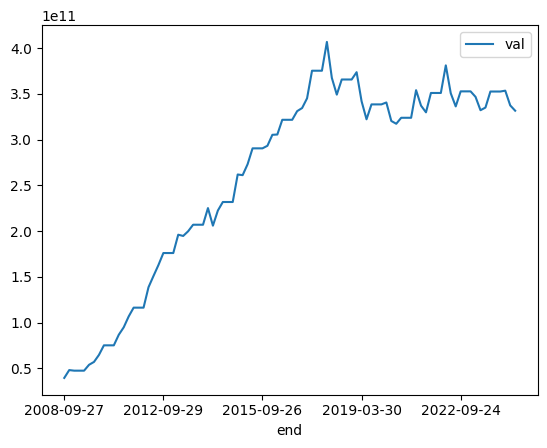

In [35]:
# plot 
assets10Q.plot(x='end', y='val')